# Aamir Nawab - BDTT ASSIGNMENT

In [2]:
import pyspark
import os
import subprocess as sp

First create directory and extract data.tgz in directory

In [3]:
# Make new directory to put assignment files
try:
    sp.check_output("ls -l ~/assignment/Aamir_Nawab/juptyer_notebook/", shell = True)
except:
    os.system("mkdir -p ~/assignment/Aamir_Nawab/juptyer_notebook/")

In [4]:
# check if data.tgz is in downloads

if sp.check_output("ls -l ~/Downloads/data.tgz", shell = True):
    print('File exists')
else:
    print("File Does Not Exist")    

File exists


In [5]:
# Move data.tgz to the directory created
try:
    sp.check_output("ls -l ~/assignment/Aamir_Nawab/juptyer_notebook/data.tgz", shell = True)
except:
    os.system("cp ~/Downloads/data.tgz ~/assignment/Aamir_Nawab/juptyer_notebook/")

# see if that has worked
if sp.check_output("ls -l ~/assignment/Aamir_Nawab/juptyer_notebook/data.tgz", shell = True):
    print('File Exists')
else:
    print("File Does Not Exist")

File Exists


In [6]:
#extractdata.tgz to directory
try: 
    sp.check_output("ls -l ~/assignment/Aamir_Nawab/juptyer_notebook/db_setup.sql", shell = True)
    sp.check_output("ls -l ~/assignment/Aamir_Nawab/juptyer_notebook/diagnoses.sql", shell = True)
    sp.check_output("ls -l ~/assignment/Aamir_Nawab/juptyer_notebook/hearing_evaluation.sql", shell = True)
    sp.check_output("ls -l ~/assignment/Aamir_Nawab/juptyer_notebook/imaging.sql", shell = True)
except:
    os.system("tar xzvf ~/assignment/Aamir_Nawab/juptyer_notebook/data.tgz -C ~/assignment/Aamir_Nawab/juptyer_notebook")

In [7]:
#Check if that has worked

if sp.check_output("ls -l ~/assignment/Aamir_Nawab/juptyer_notebook/db_setup.sql", shell = True)\
and sp.check_output("ls -l ~/assignment/Aamir_Nawab/juptyer_notebook/diagnoses.sql", shell = True)\
and sp.check_output("ls -l ~/assignment/Aamir_Nawab/juptyer_notebook/hearing_evaluation.sql", shell = True)\
and sp.check_output("ls -l ~/assignment/Aamir_Nawab/juptyer_notebook/imaging.sql", shell = True):
    print('Files have been extracted')
else:
    print('Files have not been extracted')

Files have been extracted


# Pre-Processing

In [8]:
# Run db_setup.sql, if statement to make not to run setup if tables already exists
mysql_output = sp.Popen(["mysql", "uroot", "--password=cloudera", "--database=assignment", "--execute=SHOW TABLES"],
                  stdout = sp.PIPE, stderr = sp.PIPE).communicate()

if "diagnoses" and "hearing_evaluation" and "imaging" not in [i.split("\n") for i in mysql_output][0]:
    os.system("mysql -uroot -pcloudera < ~/assignment/Aamir_Nawab/juptyer_notebook/db_setup.sql")
else:
    for i in [i.split("\n") for i in mysql_output][0]:
        print(i)

In [9]:
# if hearing_evaluation table not populated, populate with hearing_evaluation.sql
hearing_output = sp.Popen(["mysql", "-uroot", "--password=cloudera", "--database=assignment",
                   "--execute=SELECT * FROM hearing_evaluation LIMIT 5"],
                   stdout = sp.PIPE, stderr = sp.PIPE).communicate()

if hearing_output[0] == '' and hearing_output[1]=='':
    os.system("cat ~/assignment/Aamir_Nawab/juptyer_notebook/hearing_evaluation.sql\
    | sort -u -t ',' -k 1,2 -s | grep -v 'NULL' | \
    mysql -uroot -pcloudera assignment")
    hearing_output_1 = sp.Popen(["mysql", "-uroot", "--password=cloudera", "--database=assignment",
                  "--execute=SELECT * FROM hearing_evaluation LIMIT 5"],
                   stdout = sp.PIPE, stderr = sp.PIPE).communicate()
    for i in [i.split("\n") for i in hearing_output_1][0]:
         print(i)
else:
    for i in [i.split("\n") for i in hearing_output][0]:
         print(i)

patient_id	evaluation_age	severity_of_hearing_loss	unilateral_or_bilateral	has_conductive_hearing_loss	has_sensorineural_hearing_loss
000J1TN48	2.11859389559818	Normal	Insufficient Data	f	f
000JE5P7L	3.38154832047061	Normal	Insufficient Data	f	f
001M87HBZ	5.19128693100837	Normal	Insufficient Data	t	f
001M87HBZ	8.24376339137186	Mild	Insufficient Data	t	f
002ANH0GH	7.35543953897321	Normal	Normal	f	f



In [10]:
# imaging table not populated, populate with imaging.sql
imaging_output = sp.Popen(["mysql", "-uroot", "--password=cloudera", "--database=assignment",
                   "--execute=SELECT * FROM imaging LIMIT 5"],
                   stdout = sp.PIPE, stderr = sp.PIPE).communicate()

if imaging_output[0] == '' and imaging_output[1]=='':
    os.system("cat ~/assignment/Aamir_Nawab/juptyer_notebook/imaging.sql\
    | sort -u -t ',' -k 1,2 -s | grep -v 'NULL' | \
    mysql -uroot -pcloudera assignment")
    imaging_output_1 = sp.Popen(["mysql", "-uroot", "--password=cloudera", "--database=assignment",
                   "--execute=SELECT * FROM imaging LIMIT 5"],
                  stdout = sp.PIPE, stderr = sp.PIPE).communicate()
    for i in [i.split("\n") for i in imaging_output_1][0]:
        print(i)
else:
    for i in [i.split("\n") for i in imaging_output][0]:
        print(i)

patient_id	imaging_age	modality
00R99YUB4	8.15341238568207	CT
0263DNQG8	0.078671260881339	CT
02AQQ4CLC	5.47329158513104	MR
02AQQ4CLC	5.58251725238167	MR
02AQQ4CLC	5.72791714662045	MR



In [11]:
# diagnoses table not populated, populate with diagnoses.sql

diagnoses_output = sp.Popen(["mysql", "-uroot", "--password=cloudera", "--database=assignment",
                   "--execute=SELECT * FROM diagnoses LIMIT 5"],
                   stdout = sp.PIPE, stderr = sp.PIPE).communicate()

if diagnoses_output[0] == '' and diagnoses_output[1]=='':
    os.system("cat ~/assignment/Aamir_Nawab/juptyer_notebook/diagnoses.sql\
    | sort -u -t ',' -k 1,2 -s | grep -v 'NULL' | \
    mysql -uroot -pcloudera assignment")
    diagnoses_output_1 = sp.Popen(["mysql", "-uroot", "--password=cloudera", "--database=assignment",
                   "--execute=SELECT * FROM diagnoses LIMIT 5"],
                  stdout = sp.PIPE, stderr = sp.PIPE).communicate()
    for i in [i.split("\n") for i in diagnoses_output_1][0]:
        print(i)
else:
    for i in [i.split("\n") for i in diagnoses_output][0]:
        print(i)

patient_id	diagnosis_code	diagnosis_age
00008RINR	315.320000	2.18430371791803
00008RINR	315.350000	3.86737218091803
00008RINR	333.100000	3.2692940406742
00008RINR	372.140000	2.43619137014411
00008RINR	375.200000	3.42535486868384



In [12]:
#import all table with sqoop
hdfs_output = sp.Popen(["hdfs", "dfs", "-ls", "/assignment"],
                  stdout = sp.PIPE, stderr = sp.PIPE).communicate()
if "No such file or directory" in hdfs_output:
    os.system("sqoop import-all-tables --connect jdbc:mysql://localhost/assignment --username root \
    --password cloudera --fields-terminated-by '\t' --warehouse-dir /assignment --as-parquetfile \
    --compression-codec snappy --driver com.mysql.jdbc.Driver --fetch-size -2147483648")
    sp.Popen(["hdfs", "dfs", "-ls", "/assignment"], stdout=sp.PIPE, stderr = sp.PIPE).communicate()
# else print content of dir
else:
    print(hdfs_output[0])

Found 3 items
drwxr-xr-x   - cloudera supergroup          0 2020-06-11 04:50 /assignment/diagnoses
drwxr-xr-x   - cloudera supergroup          0 2020-06-11 11:46 /assignment/hearing_evaluation
drwxr-xr-x   - cloudera supergroup          0 2020-06-11 11:31 /assignment/imaging



In [13]:
# chmod /tmp dir
os.system("sudo chmod 0777 /tmp")
sp.Popen(["hdfs", "dfsadmin", "-safemode", "leave"], stdout=sp.PIPE, stderr = sp.PIPE).communicate()

#dump tables from mysql and move the output .csv files from /tmp to /assignment if no there yet
try:
    sp.check_output("ls -l ~/assignment/Aamir_Nawab/juptyer_notebook/imaging.csv", shell = True)
    sp.check_output("ls -l ~/assignment/Aamir_Nawab/juptyer_notebook/hearing_evaluation.csv", shell = True)
    sp.check_output("ls -l ~/assignment/Aamir_Nawab/juptyer_notebook/diagnoses.csv", shell = True)
except:
    #imaging.csv
    sp.Popen(["mysql", "-uroot", "--password=cloudera", "--database=assignment",
          "--execute=SELECT 'patient_id', 'imaging_age', 'modality' UNION SELECT *\
            INTO OUTFILE '/tmp/imaging.csv' FIELDS TERMINATED BY ','ENCLOSED BY '\"'\
            ESCAPED BY '\\\\' LINES TERMINATED BY '\\n' FROM imaging;"],
            stdout=sp.PIPE, stderr=sp.PIPE).communicate()
    #mv csv to assignment folder
    os.system("sudo mv /tmp/imaging.csv ~/assignment/Aamir_Nawab/juptyer_notebook/imaging.csv")
    #hearing_evalutation.csv
    sp.Popen(["mysql", "-uroot", "--password=cloudera", "--database=assignment",
              "--execute=SELECT 'patient_id', 'evaluation_age', 'severity_of_hearing_loss', \
              'unilateral_or_bilateral', 'has_conductive_hearing_loss', \
              'has_sensorineural_hearing_loss' UNION SELECT * \
              INTO OUTFILE '/tmp/hearing_evaluation.csv' FIELDS TERMINATED BY ','\
              ENCLOSED BY '\"' ESCAPED BY '\\\\' LINES TERMINATED BY '\n' FROM hearing_evaluation;"],
             stdout=sp.PIPE, stderr=sp.PIPE).communicate()
    #mv csv to assginment folder
    os.system("sudo mv /tmp/hearing_evaluation.csv ~/assignment/Aamir_Nawab/juptyer_notebook/hearing_evaluation.csv")
    #diagnoses.csv
    sp.Popen(["mysql", "-uroot", "--password=cloudera", "--database=assignment",
              "--execute=SELECT 'patient_id', 'diagnosis_code', 'diagnosis_age' UNION SELECT *\
              INTO OUTFILE '/tmp/diagnoses.csv' FIELDS TERMINATED BY ',' ENCLOSED BY '\"'\
              ESCAPED BY '\\\\' LINES TERMINATED BY '\\n' FROM diagnoses;"],
             stdout=sp.PIPE, stderr=sp.PIPE).communicate()
    #mv csv to assignment folder
    os.system("sudo mv /tmp/diagnoses.csv ~/assignment/Aamir_Nawab/juptyer_notebook/diagnoses.csv")

In [14]:
#Check if CSV files in directory
print (sp.check_output("ls -l ~/assignment/Aamir_Nawab/juptyer_notebook/imaging.csv", shell = True))
print (sp.check_output("ls -l ~/assignment/Aamir_Nawab/juptyer_notebook/hearing_evaluation.csv", shell = True))
print (sp.check_output("ls -l ~/assignment/Aamir_Nawab/juptyer_notebook/diagnoses.csv", shell = True))


-rw-rw-rw- 1 cloudera cloudera 115979 Aug 15 07:34 /home/cloudera/assignment/Aamir_Nawab/juptyer_notebook/imaging.csv

-rw-rw-rw- 1 cloudera cloudera 3287120 Jun 11 07:28 /home/cloudera/assignment/Aamir_Nawab/juptyer_notebook/hearing_evaluation.csv

-rw-rw-rw- 1 cloudera cloudera 549490852 Jun 11 07:42 /home/cloudera/assignment/Aamir_Nawab/juptyer_notebook/diagnoses.csv



# Load CSV files in Spark Dataframe

In [15]:
from pyspark.sql.types import *
import pandas as pd
from pyspark.sql.functions import *
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from pyspark.sql import SQLContext
sqlCtx = SQLContext(sc)

In [16]:
#Create a Schema for loading Diagnoses.csv into a DataFrame
diagnoses_schema = StructType ([StructField ("patient_id", StringType(), True),\
                              StructField ("diagnosis_code",StringType(), True),\
                              StructField ("diagnosis_age",DoubleType(), True)])

In [17]:
# load csv file into DataFrame 
diagnoses_df = sqlCtx.read.format('com.databricks.spark.csv')\
.options(header = 'true').schema(diagnoses_schema)\
.load('file:/home/cloudera/assignment/Aamir_Nawab/juptyer_notebook/diagnoses.csv')

In [18]:
# Check if csv has been loaded into dataframe
diagnoses_df.show(5)

+----------+--------------+----------------+
|patient_id|diagnosis_code|   diagnosis_age|
+----------+--------------+----------------+
| 00008RINR|    315.320000|2.18430371791803|
| 00008RINR|    315.320000|2.80033330216659|
| 00008RINR|    315.320000| 2.8222365762732|
| 00008RINR|    315.320000|5.64822705794013|
| 00008RINR|    315.320000|5.68655778752176|
+----------+--------------+----------------+
only showing top 5 rows



In [19]:
# creating schema for hearing _evaluation
hearing_schema = StructType ([StructField ("patient_id", StringType(), True),\
                              StructField ("evaluation_age",DoubleType(), True),\
                              StructField ("severity_of_hearing_loss",StringType(), True),\
                              StructField ("unilateral_or_bilateral",StringType(), True),\
                              StructField ("has_conductive_hearing_loss",StringType(), True),\
                              StructField ("has_sensorineural_hearing_loss",StringType(), True)])

In [20]:
#load csv into Dataframe
hearing_evaluation_df = sqlCtx.read.format('com.databricks.spark.csv')\
.options(header = 'true').schema(hearing_schema)\
.load('file:/home/cloudera/assignment/Aamir_Nawab/juptyer_notebook/hearing_evaluation.csv')

In [21]:
#check if csv has loaded into dataframe
hearing_evaluation_df.show(5)

+----------+----------------+------------------------+-----------------------+---------------------------+------------------------------+
|patient_id|  evaluation_age|severity_of_hearing_loss|unilateral_or_bilateral|has_conductive_hearing_loss|has_sensorineural_hearing_loss|
+----------+----------------+------------------------+-----------------------+---------------------------+------------------------------+
| 000J1TN48|2.11859389559818|                  Normal|      Insufficient Data|                          f|                             f|
| 000JE5P7L|3.38154832047061|                  Normal|      Insufficient Data|                          f|                             f|
| 001M87HBZ|5.19128693100837|                  Normal|      Insufficient Data|                          t|                             f|
| 001M87HBZ|8.24376339137186|                    Mild|      Insufficient Data|                          t|                             f|
| 002ANH0GH|7.35543953897321|     

In [22]:
# creating schema for imaging 
imaging_schema = StructType ([StructField ("patient_id", StringType(), True),\
                              StructField ("imaging_age",DoubleType(), True),\
                              StructField ("modality",StringType(), True)])

In [23]:
# load csv into dataframe
imaging_df = sqlCtx.read.format('com.databricks.spark.csv')\
.options(header = 'true').schema(imaging_schema)\
.load('file:/home/cloudera/assignment/Aamir_Nawab/juptyer_notebook/imaging.csv')

In [24]:
imaging_df.show(5)

+----------+-----------------+--------+
|patient_id|      imaging_age|modality|
+----------+-----------------+--------+
| 00R99YUB4| 8.15341238568207|      CT|
| 0263DNQG8|0.078671260881339|      CT|
| 02AQQ4CLC| 5.47329158513104|      MR|
| 02AQQ4CLC| 5.58251725238167|      MR|
| 02AQQ4CLC| 5.72791714662045|      MR|
+----------+-----------------+--------+
only showing top 5 rows



# Load CSV into RDD 

In [25]:
from pyspark.rdd import RDD
imaging = sc.textFile("file:///home/cloudera/assignment/Aamir_Nawab/juptyer_notebook/imaging.csv")
diagnoses = sc.textFile("file:///home/cloudera/assignment/Aamir_Nawab/juptyer_notebook/diagnoses.csv")
hearing_evaluation = sc.textFile("file:///home/cloudera/assignment/Aamir_Nawab/juptyer_notebook/hearing_evaluation.csv")

In [26]:
# imaging evaluation 
imaging_header = imaging.first()
imaging_rdd = imaging.filter(lambda row: row != imaging_header ).map(lambda x: x.replace('"','').split(","))
# diagnoses evalaution 
diagnoses_header = diagnoses.first()
diagnoses_rdd=diagnoses.filter(lambda row: row != diagnoses_header ).map(lambda x: x.replace('"','').split(","))
# hearing evaluation
hearing_header = hearing_evaluation.first()
hearing_evaluation_rdd = hearing_evaluation.filter(lambda row: row != hearing_header).map(lambda x: x.replace('"','').split(","))

# check output
imaging_rdd.take(5)

[[u'00R99YUB4', u'8.15341238568207', u'CT'],
 [u'0263DNQG8', u'0.078671260881339', u'CT'],
 [u'02AQQ4CLC', u'5.47329158513104', u'MR'],
 [u'02AQQ4CLC', u'5.58251725238167', u'MR'],
 [u'02AQQ4CLC', u'5.72791714662045', u'MR']]

# Problem statement 1 Spark DataFrame

In [27]:
most_common_diagnosis_codes = diagnoses_df.groupby("diagnosis_code").count().sort("count", ascending=False)
most_common_diagnosis_codes.show(5)

+--------------+------+
|diagnosis_code| count|
+--------------+------+
|         V20.2|476228|
|    382.900000|272497|
|    389.900000|256345|
|    381.810000|213910|
|    465.900000|175831|
+--------------+------+
only showing top 5 rows



# Problem Statement 1 RDD 

In [28]:
#The 5 most common diagnosis codes along with their frequencies

most_common_diagnosis_codes_rdd =diagnoses_rdd.map(lambda x: (x[1],1)).reduceByKey(lambda x1,y1: x1+y1).sortBy(lambda x: x[1], False)
most_common_diagnosis_codes_rdd.take(5)

[(u'V20.2', 476228),
 (u'382.900000', 272497),
 (u'389.900000', 256345),
 (u'381.810000', 213910),
 (u'465.900000', 175831)]

# Problem Statement 1 Visualisation

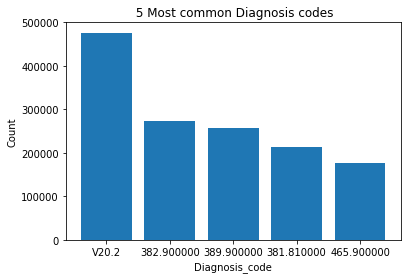

In [29]:
#Five Most Common Diagnosis codes

most_common_diagnosis_codes_df = pd.DataFrame(data = most_common_diagnosis_codes.head(5))

plt.bar(most_common_diagnosis_codes_df[0],most_common_diagnosis_codes_df[1])
plt.xlabel('Diagnosis_code')
plt.ylabel('Count')
plt.title(' 5 Most common Diagnosis codes')
plt.show()

In [30]:
#mkdir to put problem statment csv solutions
try:
    sp.check_output("ls -l ~/assignment/Aamir_Nawab/juptyer_notebook/problem_statements/", shell = True)
except:
    os.system("mkdir -p ~/assignment/Aamir_Nawab/juptyer_notebook/problem_statements/")

In [33]:
#create csv file for solution 
most_common_diagnosis_codes.limit(5).write.format('com.databricks.spark.csv')\
.save('file:///home/cloudera//assignment/Aamir_Nawab/juptyer_notebook/problem_statements/problem_statement_1')

# Problem Statement 2 DataFrame

In [34]:
# Problem statement 2
# 5 most common diagnosis codes at the time of hearing evaluation

# join diagnoses_df and hearing_evaluation_df on patient id and diagnosis age/evaluation age
join_diagnoses_df_and_hearing_evaluation_df = diagnoses_df.join(hearing_evaluation_df,(diagnoses_df.patient_id==hearing_evaluation_df.patient_id) & (diagnoses_df.diagnosis_age==hearing_evaluation_df.evaluation_age) ,'inner')

# group diagnois codes, count and sort descending 
most_common_diagnosis_codes_at_hearing = join_diagnoses_df_and_hearing_evaluation_df.groupby("diagnosis_code").count().sort('count', ascending=False)

most_common_diagnosis_codes_at_hearing.show(5)

+--------------+-----+
|diagnosis_code|count|
+--------------+-----+
|    389.180000|   13|
|         V20.2|   12|
|    389.900000|    9|
|    493.900000|    9|
|    315.390000|    9|
+--------------+-----+
only showing top 5 rows



# Problem Statement 2 RDD

In [35]:
#5 most common diagnosis codes at the time of hearing evaluation
# select patient id, age and diagnoses code from diagnoses and select patient id, age from hearing evaluation and join both rdds together
join_rdd = diagnoses_rdd.map(lambda x: ((x[0],x[2]),(x[1]))).join(hearing_evaluation_rdd.map(lambda x: ((x[0],x[1]),(x[3]))))

#assign key value pair to diagnosis codes, combine values with the same key and then count frequency
most_common_diagnosis_codes_at_hearing_rdd = join_rdd.map(lambda x: (x[1])).map(lambda x: (x[0])).map(lambda x: (x,1)).reduceByKey(lambda x1,y1: x1+y1).sortBy(lambda x: x[1], False)

# five most common diagnoses code at time of hearing
most_common_diagnosis_codes_at_hearing_rdd.take(5)

[(u'389.180000', 13),
 (u'V20.2', 12),
 (u'493.900000', 9),
 (u'389.900000', 9),
 (u'381.810000', 9)]

# Problem Statement 2 Data Visualisation

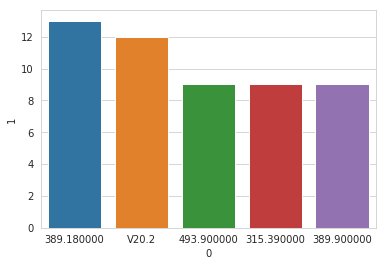

In [36]:
most_common_diagnosis_codes_at_hearing_df = pd.DataFrame(data = most_common_diagnosis_codes_at_hearing.head(5))

sns.set_style('whitegrid')
one = sns.barplot(x = most_common_diagnosis_codes_at_hearing_df[0], y =most_common_diagnosis_codes_at_hearing_df[1], data = most_common_diagnosis_codes_at_hearing_df )


In [37]:
#create csv file for solution 
most_common_diagnosis_codes_at_hearing.limit(5).write.format('com.databricks.spark.csv')\
.save('file:///home/cloudera//assignment/Aamir_Nawab/juptyer_notebook/problem_statements/problem_statement_2')

# Problem Stateament 3 Spark DataFrame

In [38]:
#Problem statement 3 
#highest number of diagnoses assigned to a single pateint 
# group patient_id, count, sort descending
diagnoses_to_a_single_patient = diagnoses_df.groupBy("patient_id").count().sort("count", ascending=False)

diagnoses_to_a_single_patient.show(1)

#Problem Statement - additional analysis

# To make sure dataset is sensible we can check the five patients with the most diagnoses
diagnoses_to_a_single_patient.show(5)

+----------+-----+
|patient_id|count|
+----------+-----+
| 59VKSHG5W| 8557|
+----------+-----+
only showing top 1 row

+----------+-----+
|patient_id|count|
+----------+-----+
| 59VKSHG5W| 8557|
| S7ORRS7WB| 7828|
| 3SPYXMEMK| 7592|
| T2FMCCLFU| 6812|
| T9WIA97LK| 6504|
+----------+-----+
only showing top 5 rows



# Problem Statement 3 RDD

In [39]:
#Problem statement 3 
#highest number of diagnoses assigned to a single pateint 
# group patient_id, count, sort descending
diagnoses_to_a_single_patient = diagnoses_df.groupBy("patient_id").count().sort("count", ascending=False)

diagnoses_to_a_single_patient.show(1)

+----------+-----+
|patient_id|count|
+----------+-----+
| 59VKSHG5W| 8557|
+----------+-----+
only showing top 1 row



# Problem Statement 3 Visualisation 

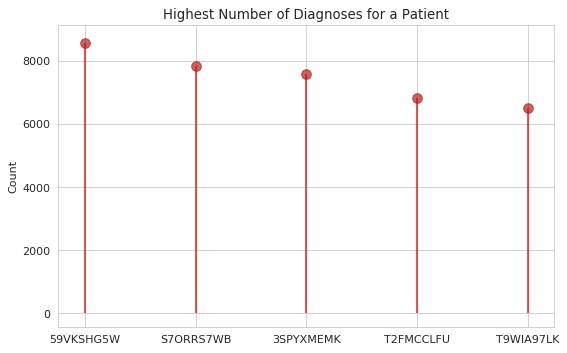

In [40]:
# The following shows the the 5 highest diagnoses performed on a patient

diagnoses_to_a_single_patient_df = pd.DataFrame(data = diagnoses_to_a_single_patient.head(5))

fig, ax = plt.subplots(figsize=(8,5), dpi= 80)
ax.vlines(x=diagnoses_to_a_single_patient_df[0], ymin=0, ymax=diagnoses_to_a_single_patient_df[1], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=diagnoses_to_a_single_patient_df[0], y=diagnoses_to_a_single_patient_df[1], s=75, color='firebrick', alpha=0.7)
ax.set_title('Highest Number of Diagnoses for a Patient')
ax.set_ylabel('Count')
ax.set_xticks(diagnoses_to_a_single_patient_df[0])
plt.show()

In [41]:
#Load dataframe into csv file
diagnoses_to_a_single_patient.limit(1).write.format('com.databricks.spark.csv')\
.save('file:///home/cloudera//assignment/Aamir_Nawab/juptyer_notebook/problem_statements/problem_statement_3')

# Problem Statement 4 Spark Dataframe

In [42]:
#PROBLEM STATEMENT 4
#Total number of different people with hearing problem compared to total number of people who have had a hearing evaluation 

#Total Number of people who had a hearing evaluation
total_hearing_evaluation = hearing_evaluation_df.count()
print(total_hearing_evaluation)
#Total number of different(unique) people
unique_hearing_evaluation = hearing_evaluation_df.select("patient_id").distinct()
print(unique_hearing_evaluation.count())

#Total number of people diagnosed with hearing loss
total_hearing_problems = hearing_evaluation_df.where((hearing_evaluation_df["severity_of_hearing_loss"]).isin ('Moderate','Mild','Slight','Moderately Severe','Severe','Profound'))
print(total_hearing_problems.count())

#Total number of different(unique) patients who have been diagnosed with hearing problems 
distinct_hearing_problems= total_hearing_problems.select("patient_id").distinct()
print(distinct_hearing_problems.count())

# percentage of those with hearing problem compared to total number of people who have had a hearing evaluation

percentage_of_hearing_problems = float(distinct_hearing_problems.count())/float(unique_hearing_evaluation.count()) * 100
print(percentage_of_hearing_problems)

49008
33892
17858
11417
33.6864156733


# Problem Statement 4 RDD

In [43]:
#Total number of different people with hearing problem compared to total number of people who have had a hearing evaluation 

#Total Number of people who had a hearing evaluation
total_hearing_evaluation_rdd = hearing_evaluation_rdd.count()
print(total_hearing_evaluation_rdd)
#Total number of different(unique) people
unique_hearing_evaluation_rdd = hearing_evaluation_rdd.map(lambda x: x[0]).distinct().count()
print(unique_hearing_evaluation_rdd)
#Total number of people who have hearing problems, this number will include patients who have been diagnosed multiple of times 

severity_of_hearing_loss = ['Moderate','Mild','Slight','Moderately Severe','Severe','Profound']
total_hearing_problems_rdd=hearing_evaluation_rdd.filter(lambda x: x[2] in severity_of_hearing_loss)

print(total_hearing_problems_rdd.count())

#Total number of different(unique) patients who have been diagnosed with hearing problems 
distinct_hearing_problems_rdd= total_hearing_problems_rdd.map(lambda x: x[0]).distinct()
print(distinct_hearing_problems_rdd.count())

# percentage of those with hearing problem compared to total number of people who have had a hearing evaluation
percentage_of_hearing_problems = float(distinct_hearing_problems_rdd.count())/float(unique_hearing_evaluation_rdd) * 100
print(percentage_of_hearing_problems)

49008
33892
17858
11417
33.6864156733


# Problem Statement 4 - Extra analysis

In [44]:
#percentages of each severity of hearing loss for the total number of people with hearing loss

# total number diagnosed with hearing loss
total = float(total_hearing_problems.count())

# patients diagnose with hearing loss
diagnoses_severity_of_hearing_loss = hearing_evaluation_df.where(hearing_evaluation_df["severity_of_hearing_loss"].isin("Mild","Moderately Severe","Slight","Profound", "Severe","Moderate")).groupBy("severity_of_hearing_loss").count()

diagnoses_severity_of_hearing_loss.show()

#percentage of each severity of hearing loss
mild = float(diagnoses_severity_of_hearing_loss.where(diagnoses_severity_of_hearing_loss.severity_of_hearing_loss == 'Mild').select('count').collect()[0]['count']/total)*100
slight = float(diagnoses_severity_of_hearing_loss.where(diagnoses_severity_of_hearing_loss.severity_of_hearing_loss == 'Slight').select('count').collect()[0]['count']/total)*100
moderate = float(diagnoses_severity_of_hearing_loss.where(diagnoses_severity_of_hearing_loss.severity_of_hearing_loss == 'Moderate').select('count').collect()[0]['count']/total)*100
mod_severe = float(diagnoses_severity_of_hearing_loss.where(diagnoses_severity_of_hearing_loss.severity_of_hearing_loss == 'Moderately Severe').select('count').collect()[0]['count']/total)*100
severe = float(diagnoses_severity_of_hearing_loss.where(diagnoses_severity_of_hearing_loss.severity_of_hearing_loss == 'Severe').select('count').collect()[0]['count']/total)*100
profound = float(diagnoses_severity_of_hearing_loss.where(diagnoses_severity_of_hearing_loss.severity_of_hearing_loss == 'Profound').select('count').collect()[0]['count']/total)*100
print('Mild: %f' %(mild))
print('Slight: %f'%(slight))
print('Moderate: %f'%(moderate))
print('Moderately Severe: %f'%(mod_severe))
print('Severe: %f'%(severe))
print('Profound: %f'%(profound))

+------------------------+-----+
|severity_of_hearing_loss|count|
+------------------------+-----+
|                Profound|  323|
|       Moderately Severe| 2023|
|                Moderate| 3777|
|                  Slight| 1619|
|                  Severe|  229|
|                    Mild| 9887|
+------------------------+-----+

Mild: 55.364543
Slight: 9.065965
Moderate: 21.150185
Moderately Severe: 11.328256
Severe: 1.282338
Profound: 1.808713


# Problem Statement 4 - Data Visualisation

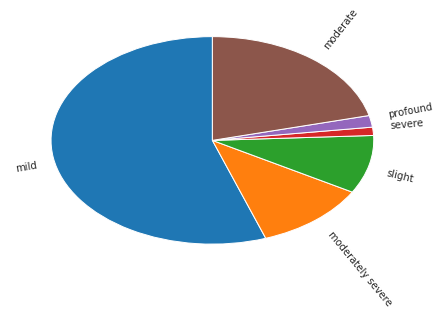

In [45]:
# visualisation for additional analysis


percent = [mild,mod_severe, slight, severe, profound, moderate]
labels = ['mild','moderately severe', 'slight', 'severe', 'profound', 'moderate']
plt.pie(x = percent, labels = labels,pctdistance = 0.85, rotatelabels  = True, startangle = 90)
plt.tight_layout()
plt.show()

In [72]:
# Three answer client is looking for into RDD
Problem_Statement_4 = sc.parallelize([total_hearing_evaluation,unique_hearing_evaluation.count(),percentage_of_hearing_problems])
#RDD save as csv
Problem_Statement_4.saveAsTextFile('file:///home/cloudera//assignment/Aamir_Nawab/juptyer_notebook/problem_statements/problem_statement_4.csv')


# Problem Statement 5

In [73]:
#PROBLEM STATEMENT 5
#Focusing on the patients with hearing loss, the client would like to know the average number of CT / MT / SC investigations performed on them. Both the number of investigations and the total number of patients with hearing loss as well as the average should be presented.

#number of patients with hearing loss
print(distinct_hearing_problems.count())

#Total number of investigations 
print(imaging_df.count())

#Number of patients with hearing loss that scans performed on them 
join_hearing_and_imaging = distinct_hearing_problems.join(imaging_df,(distinct_hearing_problems.patient_id==imaging_df.patient_id),'inner')
print(join_hearing_and_imaging.count())

# Working out the perecentage of investigations performed on those with hearing problems
average  = float(join_hearing_and_imaging.count())/float(distinct_hearing_problems.count())
percentage_average = average * 100
print(percentage_average)


11417
3223
627
5.49181045809


# Problem Statement 5 - Additional Analysis

In [74]:
pt = join_hearing_and_imaging.groupBy('modality').count()
pt.show(5)

total_inv = float(join_hearing_and_imaging.count())
total1 = float(distinct_hearing_problems.count())
MR = float(pt.where(pt.modality == 'MR').select('count').collect()[0]['count']/total_inv)*100
CT = float(pt.where(pt.modality == 'CT').select('count').collect()[0]['count']/total_inv)*100


print('Total patients = %d' %total1)
print('Total Investigations = %d' %total_inv)
print('MR scans = %f'%MR)
print('CT scans = %f'%CT)


+--------+-----+
|modality|count|
+--------+-----+
|      CT|  363|
|      MR|  264|
+--------+-----+

Total patients = 11417
Total Investigations = 627
MR scans = 42.105263
CT scans = 57.894737


# Problem Statement 5 - Visualisation

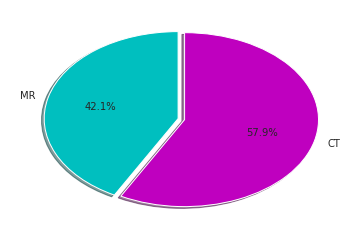

In [75]:
# percentage of different scan performed
scans = [MR, CT]
labels1 = ['MR', 'CT']
cols = ['c','m']
plt.pie(scans, labels = labels1, colors = cols, startangle=90, shadow=True,
        explode = (0,0.05), autopct='%1.1f%%')
plt.show()

In [76]:
#Answer client is looking for into rdd
Problem_statement_5 = sc.parallelize([total_inv,total1, percentage_average])

#rdd into csv
Problem_statement_5.saveAsTextFile('file:///home/cloudera//assignment/Aamir_Nawab/juptyer_notebook/problem_statements/problem_statement_5')

# Problem Statement 6 - Spark DataFrame

In [77]:
greatest_number_of_CTs_on_age = imaging_df.where(imaging_df['modality'].isin('CT'))\
.groupBy(imaging_df.imaging_age.cast(IntegerType())).count().sort('count', ascending=False)\
.withColumnRenamed('CAST(imaging_age AS INT)','age')

greatest_number_of_CTs_on_age.show(10)

+------------------------+-----+
|cast(imaging_age as int)|count|
+------------------------+-----+
|                       2|  213|
|                       3|  210|
|                       5|  202|
|                       0|  160|
|                       8|  119|
|                       7|  115|
|                      10|  100|
|                       9|   95|
|                       1|   94|
|                      13|   84|
+------------------------+-----+
only showing top 10 rows



# Problem Statement 6 - RDD

In [78]:
#Looking specifically at CT imaging, the client would like to know the year group (i.e. you will need to group the ages of encounter into years) which is given the greatest number of CTs.

greatest_number_of_CTs_on_age_rdd = imaging_rdd.filter(lambda x: x[1]=='CT').map(lambda x: (int(float(x[0])), x[1])).map(lambda x: (x[0], 1)).reduceByKey(lambda x1,y1: x1+y1).sortBy(lambda x: x[1],False)

greatest_number_of_CTs_on_age.take(10)

[Row(cast(imaging_age as int)=2, count=213),
 Row(cast(imaging_age as int)=3, count=210),
 Row(cast(imaging_age as int)=5, count=202),
 Row(cast(imaging_age as int)=0, count=160),
 Row(cast(imaging_age as int)=8, count=119),
 Row(cast(imaging_age as int)=7, count=115),
 Row(cast(imaging_age as int)=10, count=100),
 Row(cast(imaging_age as int)=9, count=95),
 Row(cast(imaging_age as int)=1, count=94),
 Row(cast(imaging_age as int)=13, count=84)]

# Problem Statement 6 - Data Visualisation

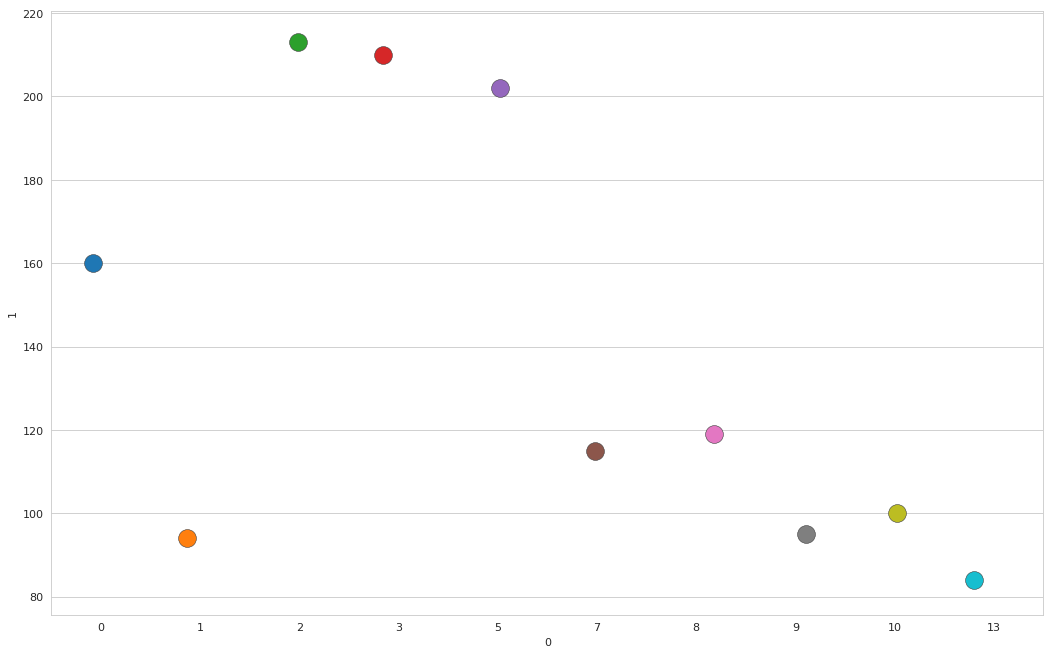

In [79]:
# Data Visualisation 
data_df  = pd.DataFrame(data = greatest_number_of_CTs_on_age.take(10))
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(x=data_df[0], y=data_df[1], data =data_df, jitter=0.25, size=16, ax=ax, linewidth=.5)


In [80]:
#load DataFrame into CSV file
greatest_number_of_CTs_on_age.write.format('com.databricks.spark.csv')\
.save('file:///home/cloudera//assignment/Aamir_Nawab/juptyer_notebook/problem_statements/problem_statement_6')

# Problem Statement 7 

In [81]:
#PROBLEM STATEMENT 7
#For each year group, the client would like to visualize the most frequent diagnosis code

#round diagnosis age, group diagnosis age and diagnosis code and count frequncy of each diagnosis code for each group
import pyspark.sql.functions as func
from pyspark.sql.functions import row_number
from pyspark.sql.window import *
from pyspark.sql import HiveContext
sqlContext = HiveContext(sc)

diagnoses_df_1 = sqlContext.read.format('com.databricks.spark.csv')\
.options(header = 'true').schema(diagnoses_schema)\
.load('file:/home/cloudera/assignment/Aamir_Nawab/juptyer_notebook/diagnoses.csv')

frequency_of_diagnosis_code = diagnoses_df_1.groupby(diagnoses_df_1.diagnosis_age.cast(IntegerType()),"diagnosis_code").count().sort('count', ascending=False)\
.withColumnRenamed('CAST(diagnosis_age AS INT)','age_group')

#For each group show only the most frequent diagnosis code and its count   

most_frequent_diagnosis_code = frequency_of_diagnosis_code.withColumn("maxrow_num", func.max("count").over(Window.partitionBy("age_group")))\
.where(func.col("count") == func.col("maxrow_num")).drop("maxrow_num").sort('count', ascending=False)

most_frequent_diagnosis_code.show(10)


+---------+--------------+------+
|age_group|diagnosis_code| count|
+---------+--------------+------+
|        0|         V20.2|148071|
|        2|    382.900000| 72800|
|        1|         V20.2| 54298|
|        3|         V20.2| 48738|
|        5|         V20.2| 40079|
|        8|         V20.2| 17314|
|        7|         V20.2| 17284|
|        9|         V20.2| 14998|
|        4|    382.900000| 12547|
|       10|         V20.2| 10611|
+---------+--------------+------+
only showing top 10 rows



In [83]:
#Problem Statement 7 load into CSV file for visualisation
most_frequent_diagnosis_code.write.format('com.databricks.spark.csv')\
.save('file:///home/cloudera//assignment/Aamir_Nawab/juptyer_notebook/problem_statements/problem_statement_7')

In [85]:
#Problem Statement 7 concatenate all of the part files into 1 csv 

os.system("cat ~/assignment/Aamir_Nawab/juptyer_notebook/problem_statements/problem_statement_7/p* > ~/assignment/Aamir_Nawab/juptyer_notebook/problem_statements/problem_statement_7/problem_statement_7.csv")

256